<a href="https://colab.research.google.com/github/Choi-Sangwook/Data-collection-and-analysis/blob/main/201804118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url1 = "https://finance.naver.com/sise/lastsearch2.naver"
response = requests.get(url1)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find("table", {"class": "type_5"})

data1 = []
header1 = []
rows1 = table.find_all("tr")

for row in rows1:
    cells1 = row.find_all("td")
    ths1=row.find_all("th")
    if not header1:
            header1 = [th.get_text().strip() for th in ths1]
    if len(cells1) > 1:
        data1.append([cell.get_text().strip() for cell in cells1])

df1 = pd.DataFrame(data1,columns=header1)
df1.head()

,순위,종목명,검색비율,현재가,전일비,등락률,거래량,시가,고가,저가,PER,ROE
0,1,에코프로,6.02%,"662,000","96,000",+16.96%,"1,761,886","570,000","662,000","569,000",44.82,2.94
1,2,이수스페셜티케미컬,2.60%,"210,000","48,100",+29.71%,"2,540,244","165,800","210,000","165,700",N/A,N/A
2,3,삼성전자,2.15%,"71,000",700,-0.98%,"14,718,430","71,300","71,600","70,800",10.72,17.07
3,4,에코프로비엠,1.74%,"270,000","12,500",+4.85%,"1,214,845","258,000","271,000","257,000",94.34,24.26
4,5,HMM,1.44%,"19,100","1,190",+6.64%,"4,477,187","18,110","19,100","18,070",1.29,64.98


네이버 증권에 인기 검색 종목 차트에서 크롤링으로 해당 테이블에 데이터를 가져와 데이터 프레임으로 만듬

In [57]:
url2 = "https://finance.naver.com/sise/sise_rise.naver"
response = requests.get(url2)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find("table", {"class": "type_2"})

data2 = []
header2 = []
rows2 = table.find_all("tr")

for row in rows2:
    cells2 = row.find_all("td")
    ths2=row.find_all("th")
    if not header2:
            header2 = [th.get_text().strip() for th in ths2]
    if len(cells2) > 1:
        data2.append([cell.get_text().strip() for cell in cells2])

df2 = pd.DataFrame(data2,columns=header2)
df7=df2.head(30)
df2.head()


,N,종목명,현재가,전일비,등락률,거래량,매수호가,매도호가,매수총잔량,매도총잔량,PER,ROE
0,1,이수스페셜티케미컬,"210,000","48,100",+29.71%,"2,540,244","210,000",0,"41,711",0,N/A,N/A
1,2,대유플러스,"1,055",151,+16.70%,"26,538,003","1,055","1,056","243,695","52,517",-3.12,-46.38
2,3,동원금속,"1,613",213,+15.21%,"9,705,400","1,612","1,613","62,996","101,912",3.80,48.51
3,4,대상홀딩스우,"10,900","1,430",+15.10%,"920,459","10,900","10,910","1,945","3,119",11.32,N/A
4,5,이수화학,"30,050","3,750",+14.26%,"20,098,025","30,050","30,100","143,166","51,951",96.94,9.41


네이버 증권에 상승 종목 차트에서 크롤링으로 해당 테이블에 데이터를 가져와 데이터 프레임으로 만듬

In [58]:
df3=pd.merge(df1,df2,on="종목명")

두 데이터 프레임을 "종목명"으로 하나의 데이터 프레임으로 결합함

In [59]:
df4=df3.iloc[:,1:7]

데이터 프레임에 겹치거나 필요없는 데이터를 제외한 데이터만 따로 골라 데이터 프레임을 만듬

In [60]:
df4.rename(columns={'현재가_x':'현재가','전일비_x':'전일비','등락률_x':'등락률','거래량_x':'거래량'},inplace=True)

바뀐 이름을 원래의 이름으로 바꾸어 열의 이름을 다시 지정하고 데이터 프레임에 저장

In [61]:
df4.to_csv("검색량이 많은 급등주.csv")

데이터 프레임을 csv파일로 변환

In [62]:
df5=pd.read_csv("검색량이 많은 급등주.csv",index_col=0)

csv파일을 데이터 프레임으로 불러오면 인덱스가 없는 상태로 불러옴

In [63]:
df5

,종목명,검색비율,현재가,전일비,등락률,거래량
0,이수스페셜티케미컬,2.60%,"210,000","48,100",+29.71%,"2,540,244"
1,HMM,1.44%,"19,100","1,190",+6.64%,"4,477,187"
2,POSCO홀딩스,0.80%,"388,500","1,000",+0.26%,"844,359"
3,이수화학,0.72%,"30,050","3,750",+14.26%,"20,098,025"
4,백광산업,0.72%,"9,950","1,150",+13.07%,"22,256,870"
5,포스코퓨처엠,0.69%,"385,000","5,000",+1.32%,"906,701"
6,금양,0.66%,"52,200","1,700",+3.37%,"1,640,857"
7,삼부토건,0.55%,"2,300",105,+4.78%,"34,680,173"
8,두산에너빌리티,0.52%,"17,400",450,+2.65%,"6,589,761"
9,대유플러스,0.50%,"1,055",151,+16.70%,"26,538,003"


In [64]:
!sudo apt-get -qq -y install fonts-nanum

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔폰트 설치 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 폰트 설정
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumBarunGothic')


In [65]:
print(df4['검색비율'].dtype)
print(df4['등락률'].dtype)



object
object


In [66]:
df5['검색비율'] = df5['검색비율'].str.rstrip('%').astype(float)
df5['등락률'] = df5['등락률'].str.rstrip('%').astype(float)

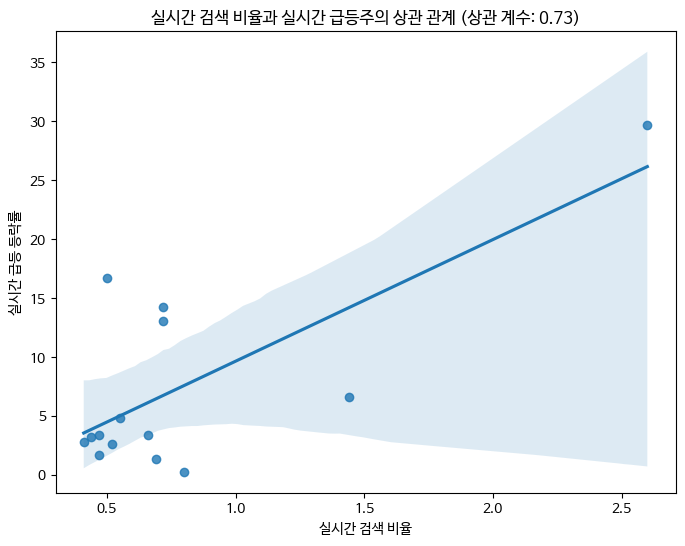

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt




# 실시간 검색 비율과 실시간 급등주 데이터의 상관 관계 계산
correlation = df5['검색비율'].corr(df5['등락률'])


# 상관 관계 시각화
plt.figure(figsize=(8, 6))
sns.regplot(data=df5, x='검색비율', y='등락률')
plt.xlabel('실시간 검색 비율')
plt.ylabel('실시간 급등 등락률')
plt.title(f'실시간 검색 비율과 실시간 급등주의 상관 관계 (상관 계수: {correlation:.2f})')
plt.show()

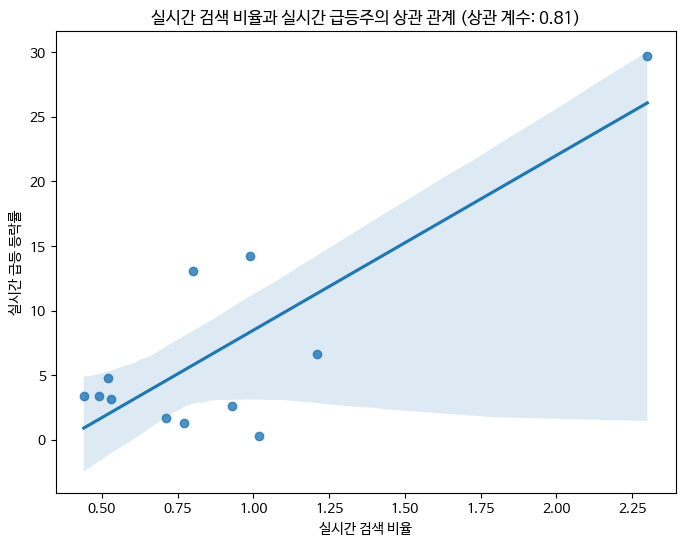

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt




# 실시간 검색 비율과 실시간 급등주 데이터의 상관 관계 계산
correlation = df5['검색비율'].corr(df5['등락률'])


# 상관 관계 시각화
plt.figure(figsize=(8, 6))
sns.regplot(data=df5, x='검색비율', y='등락률')
plt.xlabel('실시간 검색 비율')
plt.ylabel('실시간 급등 등락률')
plt.title(f'실시간 검색 비율과 실시간 급등주의 상관 관계 (상관 계수: {correlation:.2f})')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


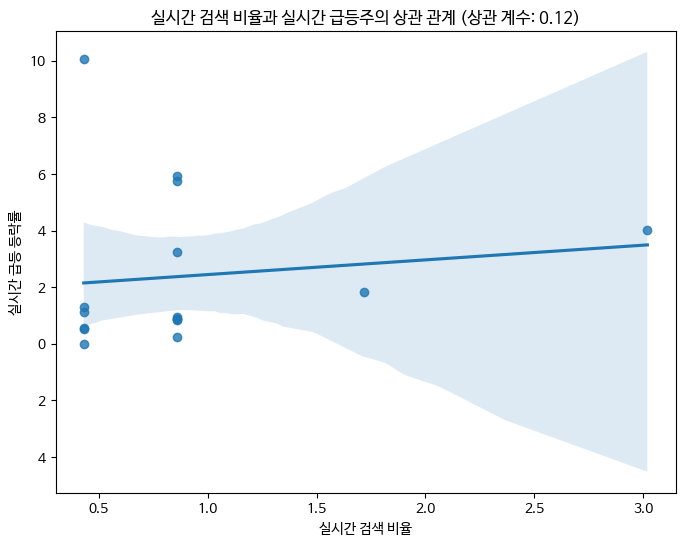

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df4['검색비율'] = df4['검색비율'].str.rstrip('%').astype(float)
df4['등락률'] = df4['등락률'].str.rstrip('%').astype(float)




# 실시간 검색 비율과 실시간 급등주 데이터의 상관 관계 계산
correlation = df5['검색비율'].corr(df5['등락률'])


# 상관 관계 시각화
plt.figure(figsize=(8, 6))
sns.regplot(data=df4, x='검색비율', y='등락률')
plt.xlabel('실시간 검색 비율')
plt.ylabel('실시간 급등 등락률')
plt.title(f'실시간 검색 비율과 실시간 급등주의 상관 관계 (상관 계수: {correlation:.2f})')
plt.show()


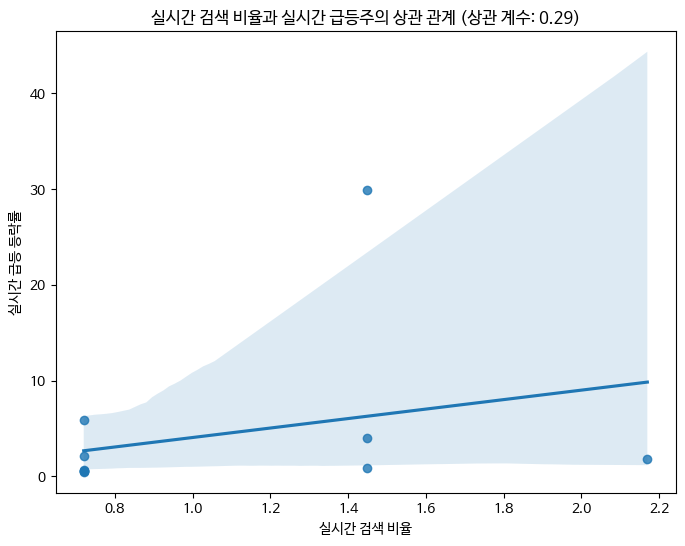

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# 실시간 검색 비율과 실시간 급등주 데이터의 상관 관계 계산
correlation = df5['검색비율'].corr(df5['등락률'])


# 상관 관계 시각화
plt.figure(figsize=(8, 6))
sns.regplot(data=df5, x='검색비율', y='등락률')
plt.xlabel('실시간 검색 비율')
plt.ylabel('실시간 급등 등락률')
plt.title(f'실시간 검색 비율과 실시간 급등주의 상관 관계 (상관 계수: {correlation:.2f})')
plt.show()

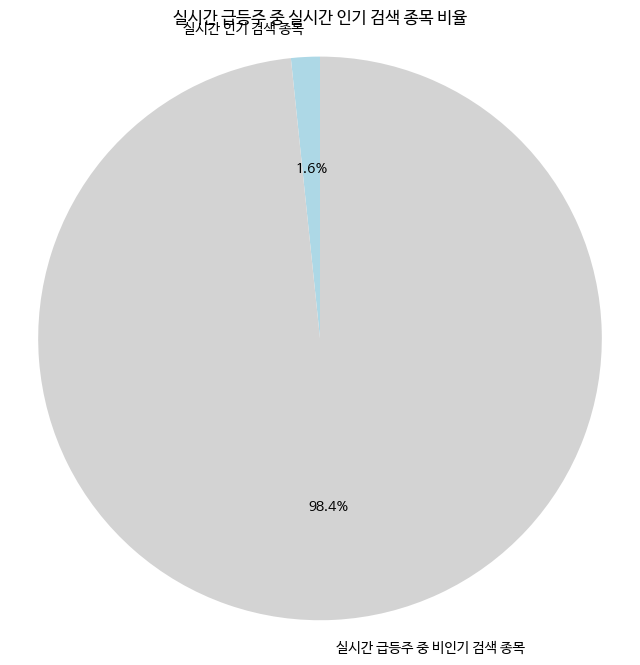

In [51]:
import matplotlib.pyplot as plt

# 실시간 급등주에 포함된 실시간 인기 검색 종목 분석
merged_df = pd.merge(df2, df1, on='종목명', how='inner')
popular_search_count = len(merged_df)
non_popular_search_count = len(df2) - popular_search_count

# 원형 그래프 시각화
labels = ['실시간 인기 검색 종목', '실시간 급등주 중 비인기 검색 종목']
sizes = [popular_search_count, non_popular_search_count]
colors = ['lightblue', 'lightgray']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('실시간 급등주 중 실시간 인기 검색 종목 비율')
plt.axis('equal')
plt.show()


In [52]:
# '종목명' 값을 리스트로 변환
df1_names = df1['종목명'].tolist()

# '종목명'이 df1_names에 포함된 경우를 필터링하여 새로운 데이터프레임 생성
df1_in_df2 = df2[df2['종목명'].isin(df1_names)]

# df1_in_df2의 개수 확인
count = len(df1_in_df2)

print(f"df2에 df1이 포함된 종목 개수: {count}")


df2에 df1이 포함된 종목 개수: 16


In [53]:
# '종목명' 값을 리스트로 변환
df1_names = df1['종목명'].tolist()

# '종목명'이 df1_names에 포함된 경우를 필터링하여 새로운 데이터프레임 생성
df1_in_df2 = df2[df2['종목명'].isin(df1_names)]

# df2에 포함된 종목의 개수
total_count = len(df2)

# df1_in_df2에 포함된 종목의 개수
included_count = len(df1_in_df2)

# 포함 비율 계산
percentage = (included_count / total_count) * 100

print(f"df2에 df1이 포함된 종목 비율: {percentage:.2f}%")


df2에 df1이 포함된 종목 비율: 1.65%


여기까지 일단 최종 코드

In [11]:
import pandas as pd
import FinanceDataReader as fdr

# 시장지수 데이터 가져오기
df_market = fdr.DataReader("KS11", start="2023-05-01", end="2023-06-07")
df_market

# CSV 파일로 저장
df_market.to_csv("시장지수.csv", index=False)


In [12]:
df_market

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-02,2504.010010,2524.419922,2503.209961,2524.389893,2524.389893,700300
2023-05-03,2510.189941,2514.370117,2497.830078,2501.399902,2501.399902,887300
2023-05-04,2494.820068,2502.139893,2486.090088,2500.939941,2500.939941,809100
2023-05-08,2518.530029,2525.840088,2511.129883,2513.209961,2513.209961,653900
2023-05-09,2512.340088,2514.810059,2495.629883,2510.060059,2510.060059,750500
2023-05-10,2505.959961,2510.129883,2488.419922,2496.510010,2496.510010,634400
2023-05-11,2505.570068,2513.820068,2490.080078,2491.000000,2491.000000,646300
2023-05-12,2487.350098,2487.350098,2472.449951,2475.419922,2475.419922,797200
2023-05-15,2469.800049,2479.350098,2455.989990,2479.350098,2479.350098,483300


In [10]:
!pip install finance-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 검색량 데이터 로드
df_search = pd.read_csv("검색량이 많은 급등주.csv")

# 시장지수 데이터 로드
df_market = pd.read_csv("시장지수.csv")

# 데이터 전처리 - 날짜 컬럼 추가
df_search['날짜'] = pd.to_datetime(df_search['날짜'])

# 데이터 병합
df_merged = pd.merge(df_search, df_market, on="날짜")

# 상관관계 분석
correlation = df_merged["상승률"].corr(df_merged["시장지수"])

# 시각화 - 검색량, 시장지수, 주가 상승률
plt.plot(df_merged["날짜"], df_merged["검색량"], label="검색량")
plt.plot(df_merged["날짜"], df_merged["시장지수"], label="시장지수")
plt.plot(df_merged["날짜"], df_merged["상승률"], label="주가 상승률")
plt.xlabel("날짜")
plt.ylabel("값")
plt.title("검색량, 시장지수, 주가 상승률 변화")
plt.legend()
plt.show()

# 시각화 - 상관계수 표시
plt.scatter(df_merged["검색량"], df_merged["상승률"])
plt.xlabel("검색량")
plt.ylabel("주가 상승률")
plt.title("검색량과 주가 상승률의 상관관계")
plt.show()


KeyError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 검색량 데이터 로드
df_search = pd.read_csv("검색량이 많은 급등주.csv")

# 시장지수 데이터 로드
df_market = pd.read_csv("시장지수.csv")

# 데이터 병합
df_merged = pd.merge(df_search, df_market, on="종목명")

# 상관관계 분석
correlation = df_merged["상승률"].corr(df_merged["시장지수"])

# 시각화 - 검색량, 시장지수, 주가 상승률
plt.plot(df_merged["검색량"], label="검색량")
plt.plot(df_merged["시장지수"], label="시장지수")
plt.plot(df_merged["상승률"], label="주가 상승률")
plt.xlabel("일자")
plt.ylabel("값")
plt.title("검색량, 시장지수, 주가 상승률 변화")
plt.legend()
plt.show()

# 시각화 - 상관계수 표시
plt.scatter(df_merged["검색량"], df_merged["상승률"])
plt.xlabel("검색량")
plt.ylabel("주가 상승률")
plt.title("주가 상승률과 검색량의 상관관계")
plt.text(0.1, 0.9, f"상관계수: {correlation:.2f}", transform=plt.gca().transAxes)
plt.show()


KeyError: ignored

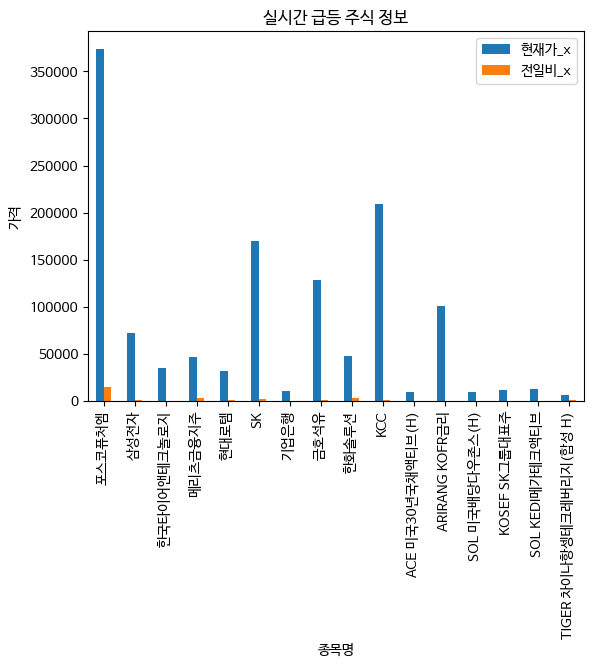

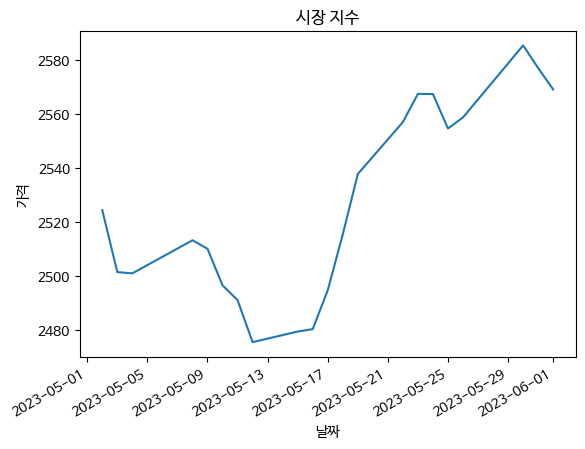

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import FinanceDataReader as fdr
url1 = "https://finance.naver.com/sise/lastsearch2.naver"
response1 = requests.get(url1)
soup1 = BeautifulSoup(response1.text, 'html.parser')

table1 = soup1.find("table", {"class": "type_5"})

data1 = []
header1 = []
rows1 = table1.find_all("tr")

for row in rows1:
    cells1 = row.find_all("td")
    ths1 = row.find_all("th")
    if not header1:
        header1 = [th.get_text().strip() for th in ths1]
    if len(cells1) > 1:
        data1.append([cell.get_text().strip() for cell in cells1])

df1 = pd.DataFrame(data1, columns=header1)
df1.head()

url2 = "https://finance.naver.com/sise/sise_rise.naver"
response2 = requests.get(url2)
soup2 = BeautifulSoup(response2.text, 'html.parser')

table2 = soup2.find("table", {"class": "type_2"})

data2 = []
header2 = []
rows2 = table2.find_all("tr")

for row in rows2:
    cells2 = row.find_all("td")
    ths2 = row.find_all("th")
    if not header2:
        header2 = [th.get_text().strip() for th in ths2]
    if len(cells2) > 1:
        data2.append([cell.get_text().strip() for cell in cells2])

df2 = pd.DataFrame(data2, columns=header2)
df2.head()
df3 = pd.merge(df1, df2, on="종목명")
df_market = fdr.DataReader("KS11", start="2023-05-01", end="2023-06-01")
# 예시: 데이터프레임 시각화
import matplotlib.pyplot as plt

# 실시간 급등 주식 정보 시각화
df3["현재가_x"] = df3["현재가_x"].str.replace(",", "").astype(float)
df3["전일비_x"] = df3["전일비_x"].str.replace(",", "").astype(float)

df3.plot(x="종목명", y=["현재가_x", "전일비_x"], kind="bar")
plt.title("실시간 급등 주식 정보")
plt.xlabel("종목명")
plt.ylabel("가격")
plt.show()


# 시장 지수 데이터 시각화
df_market["Close"].plot()
plt.title("시장 지수")
plt.xlabel("날짜")
plt.ylabel("가격")
plt.show()
# 실시간 급등 주식 정보 저장
df3.to_excel("실시간 급등 주식 정보.xlsx")
df3.to_csv("실시간 급등 주식 정보.csv")

# 시장 지수 데이터 저장
df_market.to_csv("시장 지수.csv", index=False)
